In [25]:
! pwd

/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/multiscale_run


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
u0fromFile = pd.read_csv(
    "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/multiscale_run/metabolismndam_reduced/sim/metabolism_unit_models/u0_21nov22.csv",
    sep=",",
    header=None,
)[0].tolist()

In [ ]:
from diffeqpy import de
from julia import Main

In [2]:
def f(u, p, t):
    return -u


u0 = 0.5
tspan = (0.0, 1.0)

prob = de.ODEProblem(f, u0, tspan)
integrator = de.init(prob, de.Tsit5())

de.step_b(
    integrator
)  # To use functions which on the Julia side have a !, like step!, replace ! by _b

In [3]:
def f2_b(u, p, t):
    return -u


u0 = 0.5
tspan = (0.0, 1.0)
prob = de.ODEProblem(f2_b, u0, tspan)
sol = de.solve(prob)

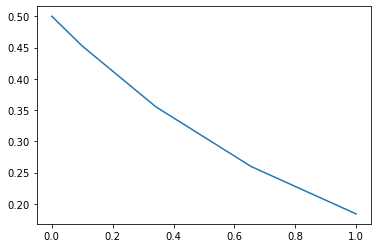

In [4]:
plt.plot(sol.t, sol.u)
plt.show()

In [5]:
sol = de.solve(prob, de.Vern9(), saveat=0.1, abstol=1e-10, reltol=1e-10)

In [10]:
import numba

numba_f = numba.jit(
    f2_b
)  # warning  https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

prob2 = de.ODEProblem(numba_f, u0, tspan)
sol2 = de.solve(prob2)

/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/shichkov/1016608/ipykernel_27596/111295241.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "f2_b" failed type inference due to: non-precise type pyobject
During: typing of argument at /gpfs/bbp.cscs.ch/ssd/slurmTmpFS/shichkov/1016608/ipykernel_27596/111295241.py (2)

File "../../../../ssd/slurmTmpFS/shichkov/1016608/ipykernel_27596/111295241.py", line 2:
<source missing, REPL/exec in use?>

  def f2_b(u,p,t):
/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/multiscale_run/python-venv/lib/python3.9/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "f2_b" was compiled in object mode without forceobj=True.

File "../../../../ssd/slurmTmpFS/shichkov/1016608/ipykernel_27596/111295241.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/multiscale_run/python-venv/lib/python3.9/site-packages/numba/core/o

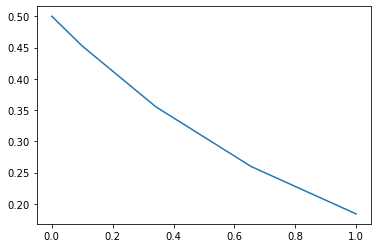

In [11]:
plt.plot(sol2.t, sol2.u)
plt.show()

In [36]:
# This will allow for more specialization and could be helpful to increase the efficiency over the Numba version for repeat or long calls


jul_f = Main.eval("(u,p,t)->-u")  # Define the anonymous function in Julia

prob3 = de.ODEProblem(jul_f, u0, tspan)
sol3 = de.solve(prob3)

In [ ]:
plt.plot(sol3.t, sol3.u)
plt.show()

In [21]:
saveat_dt = 0.01
cb_nonneg_idxs = [
    1
]  # ,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92, 94,95,96,97, 99, 102, 113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176];

sol_r23ns = de.solve(
    prob3,
    de.Rosenbrock23(autodiff=False),
    reltol=1e-8,
    abstol=1e-8,
    saveat=saveat_dt,
    maxiters=1e6,
)

# callback = callbacksetksiSyn

# diffeqpy doesn't support isoutofdomain=(u,p,t) -> any(x -> x < 0, u[cb_nonneg_idxs])

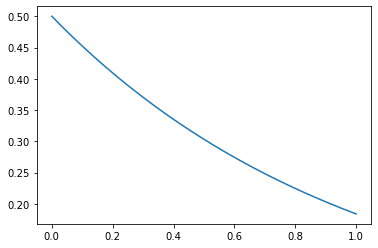

In [22]:
plt.plot(sol_r23ns.t, sol_r23ns.u)
plt.show()

In [6]:
jul_f4 = Main.eval("""
function f4!(du,u,p,t)
  x, y, z = u
  sigma, rho, beta = p
  du[1] = sigma * (y - x)
  du[2] = x * (rho - z) - y
  du[3] = x * y - beta * z
end""")
u0 = [1.0, 0.0, 0.0]
tspan = (0.0, 100.0)
p = [10.0, 28.0, 2.66]

prob4 = de.ODEProblem(jul_f4, u0, tspan, p)
sol4 = de.solve(prob4)

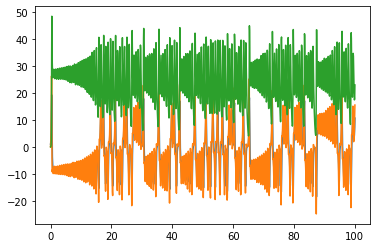

In [9]:
plt.plot(sol4.t, sol4.u)
plt.show()

In [35]:
! pwd

/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/multiscale_run


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
u0 = pd.read_csv(
    "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/multiscale_run/metabolismndam_reduced/sim/metabolism_unit_models/u0_21nov22.csv",
    sep=",",
    header=None,
)[0].tolist()

In [8]:
from diffeqpy import de
from julia import Main

In [9]:
Main.eval("""
modeldirname = "/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/sim/metabolism_unit_models/"

include(string(modeldirname,"FINAL_CLEAN/data_model_full/u0_db_refined_selected_oct2021.jl"))

pardirname = string(modeldirname,"optimiz_unit/enzymes/enzymes_preBigg/COMBO/parameters_18nov22/")

include(string(pardirname,"general_parameters.jl"))
include(string(pardirname,"ephys_parameters.jl"))
include(string(pardirname,"bf_input.jl"))
include(string(pardirname,"generalisations.jl")) # Jolivet NADH shuttles, resp
include(string(pardirname,"GLC_transport.jl"))
include(string(pardirname,"GLYCOLYSIS.jl"))
include(string(pardirname,"glycogen.jl"))

include(string(pardirname,"creatine.jl"))

include(string(pardirname,"ATDMP.jl"))

include(string(pardirname,"pyrTrCytoMito.jl"))
include(string(pardirname,"lactate.jl"))
include(string(pardirname,"TCA.jl"))

include(string(pardirname,"ETC.jl"))

include(string(pardirname,"PPP_n.jl"))
include(string(pardirname,"PPP_a.jl"))
include(string(pardirname,"gshgssg.jl"))

include(string(pardirname,"MAS.jl"))
include(string(pardirname,"gltgln.jl"))
include(string(pardirname,"pyrCarb.jl"))
include(string(pardirname,"ketones.jl"))

# for NEmodulation
xNEmod = 0.025 # 0.1 #0.00011
KdNEmod = 3.0e-4 # 3.6e-5  # 3.0e-4 #
    
Iinj = 0.0
synInput = 0.0
    
    
""")

0.0

### Test 3 metabolism coupling to ndam versions

In [16]:
# julia_code_file = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/multiscale_run/metabolismndam_reduced/sim/metabolism_unit_models/metabolism_model_21nov22_noEphys_noSB.jl"

# julia_code_file = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/multiscale_run/metabolismndam_reduced/sim/metabolism_unit_models/metabolism_model_21nov22_withEphysCurrNdam_noSB.jl"

julia_code_file = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/multiscale_run/metabolismndam_reduced/sim/metabolism_unit_models/metabolism_model_21nov22_withEphysNoCurrNdam_noSB.jl"


with open(julia_code_file, "r") as f:
    julia_code = f.read()

metabolism_b = Main.eval(julia_code)

p = [0.0, 0.0, 0.0, 0.0, 0.0]
# ina_density,ik_density,mito_scale,glutamatergic_gaba_scaling,outs_r_to_met

tspan = (0, 1)  # s

prob_met = de.ODEProblem(metabolism_b, u0, tspan, p)

In [17]:
saveat_dt = 1

sol_r23ns = de.solve(
    prob_met,
    de.Rosenbrock23(autodiff=False),
    reltol=1e-8,
    abstol=1e-8,
    saveat=saveat_dt,
    maxiters=1e6,
)

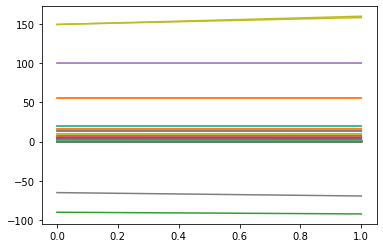

In [18]:
plt.plot(sol_r23ns.t, sol_r23ns.u)
plt.show()

In [ ]:
# using ModelingToolkit, Symbolics

# #prep_prob = ODEProblem(system_de!,u0,tspan,p)

# de_mtk = Main.eval(ModelingToolkit.modelingtoolkitize(prob_met))

# prob = de.ODEProblem(de_mtk, u0, tspan, p, sparse=True)
